### Calculation of return for a Suek-Finance Bond
In the project I extract the real financial data from QA Cloud Platform provided by Refinitiv, customize the tables in SQL Server Management Studio and migrate them into jupiter notebook to calculate and visualize the bond's price return.

In [12]:
import pandas as pd
import pyodbc 
cnxn = pyodbc.connect("Driver={SQL Server};Server=qai97-qadirectcloud-default-0j.database.windows.net;UID=0j.ivan.stroshkov;PWD=DwT!dYcV4Eaq%6L9;Database=qai;")
sql = """
SELECT dbo.FIEJVSecIdent.Value_ as 'ISIN', dbo.FIEJVPRCDly.Prc as 'Close_price', dbo.FIEJVPRCDly.TradeDate, dbo.FIEJVCpnHdr.CurrCpnRate as 'Coupon'
FROM dbo.FIEJVSecIdent
JOIN dbo.FIEJVPRCDly
ON dbo.FIEJVSecIdent.InstrCode = dbo.FIEJVPRCDly.InstrCode
JOIN dbo.FIEJVCpnHdr
ON dbo.FIEJVPRCDly.InstrCode =  dbo.FIEJVCpnHdr.InstrCode
WHERE dbo.FIEJVSecIdent.Value_ = 'RU000A0JQXR7'
"""
df = pd.read_sql_query(sql, cnxn)
print(df)

              ISIN  Close_price  TradeDate  Coupon
0     RU000A0JQXR7    101.33000 2010-08-05    0.01
1     RU000A0JQXR7    101.24000 2010-08-06    0.01
2     RU000A0JQXR7    101.25000 2010-08-09    0.01
3     RU000A0JQXR7    101.00000 2010-08-10    0.01
4     RU000A0JQXR7    101.00728 2010-08-11    0.01
...            ...          ...        ...     ...
2541  RU000A0JQXR7     98.53000 2020-04-21    0.01
2542  RU000A0JQXR7     98.53000 2020-04-22    0.01
2543  RU000A0JQXR7     98.53000 2020-04-23    0.01
2544  RU000A0JQXR7     98.53000 2020-04-24    0.01
2545  RU000A0JQXR7     98.53000 2020-04-27    0.01

[2546 rows x 4 columns]


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 4 columns):
ISIN           2546 non-null object
Close_price    2546 non-null float64
TradeDate      2546 non-null datetime64[ns]
Coupon         2546 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 79.7+ KB
None


In [71]:
# calculating daily price change of the bond
df['price_return'] = df['Close_price'].pct_change()
# calculating cumulative returns over the period
df['cumulative_price_return'] = (df['price_return']+1).cumprod()
print(df)

              ISIN  Close_price  TradeDate  Coupon  price_return  \
0     RU000A0JQXR7    101.33000 2010-08-05    0.01           NaN   
1     RU000A0JQXR7    101.24000 2010-08-06    0.01     -0.000888   
2     RU000A0JQXR7    101.25000 2010-08-09    0.01      0.000099   
3     RU000A0JQXR7    101.00000 2010-08-10    0.01     -0.002469   
4     RU000A0JQXR7    101.00728 2010-08-11    0.01      0.000072   
...            ...          ...        ...     ...           ...   
2541  RU000A0JQXR7     98.53000 2020-04-21    0.01      0.000000   
2542  RU000A0JQXR7     98.53000 2020-04-22    0.01      0.000000   
2543  RU000A0JQXR7     98.53000 2020-04-23    0.01      0.000000   
2544  RU000A0JQXR7     98.53000 2020-04-24    0.01      0.000000   
2545  RU000A0JQXR7     98.53000 2020-04-27    0.01      0.000000   

      cumulative_price_return  
0                         NaN  
1                    0.999112  
2                    0.999211  
3                    0.996743  
4                    0.

Text(0.5, 0, 'Years')

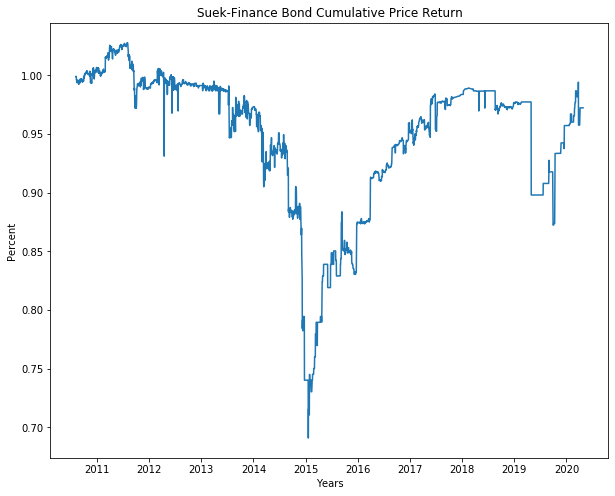

In [72]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig = plt.figure(figsize=(10, 8))
plt.plot(df['TradeDate'], df['cumulative_price_return'])
plt.title('Suek-Finance Bond Cumulative Price Return')
plt.ylabel('Percent')
plt.xlabel('Years')